## Import Bibliotek

In [94]:
import numpy as np

## Wczytanie danych

In [95]:
nazwa_pliku = 'input.txt'

# Funkcja, która zastępuje przecinki jako separator dziesiętny na kropki - w celu poprawnego wczytania danych za
# pomocą np.loadtxt
def replace_commas_with_periods(filename):
    with open(filename, 'r') as file:
        contents = file.read()
        new_contents = contents.replace(',', '.')
    with open(filename, 'w') as file:
        file.write(new_contents)

replace_commas_with_periods(nazwa_pliku)
coords = np.loadtxt('./' + nazwa_pliku, delimiter='\t')
print("Dane wejściowe:")
print("   x,   f(x)")
print(coords)

Dane wejściowe:
   x,   f(x)
[[ 0.00000e+00  1.00000e+00]
 [ 5.00000e-01  9.92900e+01]
 [ 1.00000e+00  1.89890e+02]
 [ 1.50000e+00  2.63740e+02]
 [ 2.00000e+00  3.09480e+02]
 [ 2.50000e+00  3.14870e+02]
 [ 3.00000e+00  2.68270e+02]
 [ 3.50000e+00  1.60120e+02]
 [ 4.00000e+00 -1.56400e+01]
 [ 4.50000e+00 -2.60060e+02]
 [ 5.00000e+00 -5.67750e+02]
 [ 5.50000e+00 -9.25410e+02]
 [ 6.00000e+00 -1.31036e+03]
 [ 6.50000e+00 -1.68909e+03]
 [ 7.00000e+00 -2.01577e+03]
 [ 7.50000e+00 -2.23084e+03]
 [ 8.00000e+00 -2.25948e+03]
 [ 8.50000e+00 -2.01021e+03]
 [ 9.00000e+00 -1.37339e+03]
 [ 9.50000e+00 -2.19760e+02]
 [ 1.00000e+01  1.60100e+03]]


## Przypisanie danych do zmiennych

In [96]:
xi = coords[:, 0]
fx = coords[:, 1]
h = 0.5 # Odległośc między mierzonymi punktami

## Metoda Różnic zwykłych

### Funkcja która oblicza wartość następnej kolumny na podstawie danych z poprzedniej

W każdej kolejnej kolumnie oznaczonej jako delta f(x) obliczamy różnicę między kolejnymi wartościami z poprzedniej kolumny.
Funkcja poniżej zwraca numpy array z wartościami kolejnej kolumny.

![alt text](./assets/images/1.png "Title")

In [97]:
def get_next_column(base_column: np.ndarray):
   next_column = np.array([])
   # Nie chcemy obliczać różnicy między ostatnią wartością a wartością o jeden większą, ponieważ nie ma takiej wartości
   last_f = base_column[-1]
   for index, f in np.ndenumerate(base_column):
    if f != last_f:
        next_column = np.append(next_column, round((base_column[index[0] + 1] - f), 2))
   return next_column
print("Sprawdzenie poprawności działania funkcji:")
print(get_next_column(fx))

Sprawdzenie poprawności działania funkcji:
[  98.29   90.6    73.85   45.74    5.39  -46.6  -108.15 -175.76 -244.42
 -307.69 -357.66 -384.95 -378.73 -326.68 -215.07  -28.64  249.27  636.82
 1153.63 1820.76]


### Funkcja która oblicza wszystkie kolumny w tabeli

Na podstawie poprzedniej funkcji, możemy obliczyć kolejne kolumny w tabeli różnic zwykłych.
Funkcja będzie uruchamiać się rekurencyjnie, aż do momentu, kiedy wszystkie wartości w kolumnie będą takie same.
Następnie zwróci listę z wszystkimi kolumnami.

In [98]:
def calculate_cols(column: np.ndarray, columns: list = []) -> list:
    col = get_next_column(column)
    columns.append(col)
    if len(np.unique(col)) != 1:
        calculate_cols(col, columns)
    return columns

columns = calculate_cols(fx)
# Sprawdzenie poprawności działania funkcji
for i in range(len(columns)):
    print(f'Column {i+1}: {columns[i]}')

Column 1: [  98.29   90.6    73.85   45.74    5.39  -46.6  -108.15 -175.76 -244.42
 -307.69 -357.66 -384.95 -378.73 -326.68 -215.07  -28.64  249.27  636.82
 1153.63 1820.76]
Column 2: [ -7.69 -16.75 -28.11 -40.35 -51.99 -61.55 -67.61 -68.66 -63.27 -49.97
 -27.29   6.22  52.05 111.61 186.43 277.91 387.55 516.81 667.13]
Column 3: [ -9.06 -11.36 -12.24 -11.64  -9.56  -6.06  -1.05   5.39  13.3   22.68
  33.51  45.83  59.56  74.82  91.48 109.64 129.26 150.32]
Column 4: [-2.3  -0.88  0.6   2.08  3.5   5.01  6.44  7.91  9.38 10.83 12.32 13.73
 15.26 16.66 18.16 19.62 21.06]
Column 5: [1.42 1.48 1.48 1.42 1.51 1.43 1.47 1.47 1.45 1.49 1.41 1.53 1.4  1.5
 1.46 1.44]
Column 6: [ 0.06  0.   -0.06  0.09 -0.08  0.04  0.   -0.02  0.04 -0.08  0.12 -0.13
  0.1  -0.04 -0.02]
Column 7: [-0.06 -0.06  0.15 -0.17  0.12 -0.04 -0.02 -0.12  0.2  -0.25  0.23 -0.14
  0.02]
Column 8: [ 0.    0.21 -0.32  0.29 -0.16  0.02 -0.1   0.32 -0.45  0.48 -0.37  0.16]
Column 9: [ 0.21 -0.53  0.61 -0.45  0.18 -0.12  0.42 -0.

### Funkcja która oblicza pochodną w punkcie metodą różnicy zwykłej

In [99]:
def calculate_derivative_at_point(columns: list, x: int):
    # W funkcji podajemy wartość x dla jakiej będziemy obliczać pochodną, w funkcji skorzystać musimy z indeksu tejże wartości
    index_of_value_x = np.where(xi == x)[0]
    point_fs = []
    for column in columns:
        try:
            point_fs.append(column[index_of_value_x])
        except IndexError:
            pass
            # print("No element at index: ", x)

    for index, delta_f in enumerate(point_fs):
        skladnik = 1/(index+1) * delta_f
        skladnik = skladnik if index % 2 == 0 else -skladnik
        point_fs[index] = skladnik

    point_fs = np.array(point_fs)
    return (1/h * point_fs.sum())

for x in xi:
    print(f'Pochodna w punkcie {x}: ', calculate_derivative_at_point(columns, x))

Pochodna w punkcie 0.0:  283.5204356011206
Pochodna w punkcie 0.5:  145.68643889607125
Pochodna w punkcie 1.0:  194.3829334864482
Pochodna w punkcie 1.5:  107.49441916416917
Pochodna w punkcie 2.0:  65.35997635697636
Pochodna w punkcie 2.5:  -43.99131468531469
Pochodna w punkcie 3.0:  -148.08272127872124
Pochodna w punkcie 3.5:  -284.9917907647908
Pochodna w punkcie 4.0:  -419.51981168831173
Pochodna w punkcie 4.5:  -555.7386507936507
Pochodna w punkcie 5.0:  -671.0500079365081
Pochodna w punkcie 5.5:  -751.8563333333333
Pochodna w punkcie 6.0:  -776.9009523809524
Pochodna w punkcie 6.5:  -722.8066666666667
Pochodna w punkcie 7.0:  -564.0726666666667
Pochodna w punkcie 7.5:  -271.3306666666667
Pochodna w punkcie 8.0:  186.63333333333333
Pochodna w punkcie 8.5:  857.0433333333335
Pochodna w punkcie 9.0:  1640.13
Pochodna w punkcie 9.5:  3641.52
Pochodna w punkcie 10.0:  0.0


# Metoda różnicy wstecznej

W każdej kolejnej kolumnie oznaczonej jako delta f(x) obliczamy różnicę między kolejnymi wartościami z poprzedniej kolumny.
Funkcja poniżej zwraca numpy array z wartościami kolejnej kolumny.
![alt text](./assets/images/2.png "Title")

In [100]:
fx_reverse = np.flip(fx)

def get_next_column_reverse(base_column: np.ndarray):
   next_column = np.array([])
   # Nie chcemy obliczać różnicy między ostatnią wartością a wartością o jeden większą, ponieważ nie ma takiej wartości
   first_f = base_column[-1]
   for index, f in np.ndenumerate(base_column):
    if f != first_f:
        next_column = np.append(next_column, round((f - base_column[index[0] + 1]), 2))
   return next_column
print("Sprawdzenie poprawności działania funkcji:")
print(get_next_column_reverse(fx_reverse))

Sprawdzenie poprawności działania funkcji:
[1820.76 1153.63  636.82  249.27  -28.64 -215.07 -326.68 -378.73 -384.95
 -357.66 -307.69 -244.42 -175.76 -108.15  -46.6     5.39   45.74   73.85
   90.6    98.29]


### Funkcja która oblicza wszystkie kolumny w tabeli

Na podstawie poprzedniej funkcji, możemy obliczyć kolejne kolumny w tabeli różnic zwykłych.
Funkcja będzie uruchamiać się rekurencyjnie, aż do momentu, kiedy wszystkie wartości w kolumnie będą takie same.
Następnie zwróci listę z wszystkimi kolumnami.

In [101]:
def calculate_cols_reverse(column: np.ndarray, columns: list = []) -> list:
    col = get_next_column_reverse(column)
    columns.append(col)
    if len(np.unique(col)) != 1:
        calculate_cols_reverse(col, columns)
    return columns

columns_reverse = calculate_cols_reverse(fx_reverse)
# Sprawdzenie poprawności działania funkcji
for i in range(len(columns_reverse)):
    print(f'Column {i+1}: {columns_reverse[i]}')

Column 1: [1820.76 1153.63  636.82  249.27  -28.64 -215.07 -326.68 -378.73 -384.95
 -357.66 -307.69 -244.42 -175.76 -108.15  -46.6     5.39   45.74   73.85
   90.6    98.29]
Column 2: [667.13 516.81 387.55 277.91 186.43 111.61  52.05   6.22 -27.29 -49.97
 -63.27 -68.66 -67.61 -61.55 -51.99 -40.35 -28.11 -16.75  -7.69]
Column 3: [150.32 129.26 109.64  91.48  74.82  59.56  45.83  33.51  22.68  13.3
   5.39  -1.05  -6.06  -9.56 -11.64 -12.24 -11.36  -9.06]
Column 4: [21.06 19.62 18.16 16.66 15.26 13.73 12.32 10.83  9.38  7.91  6.44  5.01
  3.5   2.08  0.6  -0.88 -2.3 ]
Column 5: [1.44 1.46 1.5  1.4  1.53 1.41 1.49 1.45 1.47 1.47 1.43 1.51 1.42 1.48
 1.48 1.42]
Column 6: [-0.02 -0.04  0.1  -0.13  0.12 -0.08  0.04 -0.02  0.    0.04 -0.08  0.09
  0.    0.06]
Column 7: [ 0.02 -0.14  0.23 -0.25  0.2  -0.12  0.06 -0.02 -0.04  0.12 -0.17  0.09
 -0.06]
Column 8: [ 0.16 -0.37  0.48 -0.45  0.32 -0.18  0.08  0.02 -0.16  0.29 -0.26  0.15]
Column 9: [ 0.53 -0.85  0.93 -0.77  0.5  -0.26  0.06  0.18 -0.

### Funkcja która oblicza pochodną w danym punkcie metodą różnicy wstecznej

In [102]:
def calculate_derivative_at_point_reverse(columns: list, x: int):
    # W funkcji podajemy wartość x dla jakiej będziemy obliczać pochodną, w funkcji skorzystać musimy z indeksu tejże wartości
    xi_reversed = np.flip(xi)
    index_of_value_x = np.where(xi_reversed == x)[0]
    point_fs = []
    for column in columns:
        try:
            point_fs.append(column[index_of_value_x])
        except IndexError:
            pass
            # print("No element at index: ", x)

    for index, delta_f in enumerate(point_fs):
        skladnik = 1/(index+1) * delta_f
        point_fs[index] = skladnik

    point_fs = np.array(point_fs)
    return (1/h * point_fs.sum())

for x in xi:
    print(f'Pochodna w punkcie {x}: ', calculate_derivative_at_point_reverse(columns_reverse, x))

Pochodna w punkcie 0.0:  0.0
Pochodna w punkcie 0.5:  196.58
Pochodna w punkcie 1.0:  173.51
Pochodna w punkcie 1.5:  124.90999999999998
Pochodna w punkcie 2.0:  54.646666666666675
Pochodna w punkcie 2.5:  -37.602000000000004
Pochodna w punkcie 3.0:  -152.05799999999996
Pochodna w punkcie 3.5:  -282.57133333333337
Pochodna w punkcie 4.0:  -420.8691428571429
Pochodna w punkcie 4.5:  -554.9977857142858
Pochodna w punkcie 5.0:  -671.4960158730158
Pochodna w punkcie 5.5:  -751.4459920634921
Pochodna w punkcie 6.0:  -777.4997922077923
Pochodna w punkcie 6.5:  -721.8516839826841
Pochodna w punkcie 7.0:  -565.412348984349
Pochodna w punkcie 7.5:  -269.84456265956277
Pochodna w punkcie 8.0:  186.4399729159729
Pochodna w punkcie 8.5:  844.0132228882228
Pochodna w punkcie 9.0:  1755.5067385261798
Pochodna w punkcie 9.5:  2885.761660969749
Pochodna w punkcie 10.0:  4508.922607933518


# Metoda różnicy centralnej

### Funkcja któa oblicza pośrednie wartości dla x
Pośrednie wartości to wartości, które znajdują się pomiędzy wartościami z tablicy xi.
Np. dla tablicy xi = [2.5, 2, 1.5] pośrednie wartości to [2.25, 1.75, 1.25]

In [103]:
def calculate_central_x(xi: np.ndarray):
    global h
    new_arr = []
    for x in xi:
        new_arr.append(x)
        new_arr.append(x + 1/2 * h)
    new_arr = np.delete(new_arr, -1)
    return new_arr

central_x = calculate_central_x(xi)
print(central_x)

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.  ]


### Funkcja która tworzy kolumnę z pustymi wartościami pomiędzy wartościami z tablicy xi

In [104]:
def create_column_with_empty_values_between(fx: np.ndarray):
    nan_array = np.full(len(fx),np.nan)
    calculated_array = np.array([])
    for element in zip(fx, nan_array):
        calculated_array = np.append(calculated_array, element)
    calculated_array = np.delete(calculated_array, -1)
    return calculated_array

print(create_column_with_empty_values_between(fx))

[ 1.00000e+00          nan  9.92900e+01          nan  1.89890e+02
          nan  2.63740e+02          nan  3.09480e+02          nan
  3.14870e+02          nan  2.68270e+02          nan  1.60120e+02
          nan -1.56400e+01          nan -2.60060e+02          nan
 -5.67750e+02          nan -9.25410e+02          nan -1.31036e+03
          nan -1.68909e+03          nan -2.01577e+03          nan
 -2.23084e+03          nan -2.25948e+03          nan -2.01021e+03
          nan -1.37339e+03          nan -2.19760e+02          nan
  1.60100e+03]


### Funkcja która oblicza wszystkie kolumny w tabeli różnic centralnych

![alt text](./assets/images/3.png "Title")

In [105]:
import pandas as pd
from IPython.display import display

central_columns = columns
#central_columns.insert(0, coords[:, 1])

new_table = np.empty((len(central_x), len(central_x)))
new_table[:] = np.nan

df = pd.DataFrame(new_table, index=central_x)

# Update DataFrame based on elements in columns list
for col_index, column in enumerate(central_columns):
    for i, val in enumerate(range(col_index+1, len(df), 2)):
        try:
            df.iloc[val, col_index] = column[i]
        except IndexError:
            pass


display(df)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.25,98.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.50,NaN,-7.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.75,90.60,NaN,-9.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.00,NaN,-16.75,NaN,-2.30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.25,73.85,NaN,-11.36,NaN,1.42,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.50,NaN,-28.11,NaN,-0.88,NaN,0.06,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.75,45.74,NaN,-12.24,NaN,1.48,NaN,-0.06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.00,NaN,-40.35,NaN,0.60,NaN,0.00,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.25,5.39,NaN,-11.64,NaN,1.48,NaN,-0.06,NaN,0.21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Obliczanie zgodnie ze wzorem:

![alt text](./assets/images/4.png "Title")
![alt text](./assets/images/5.png "Title")

In [106]:
import math

def calculate_derivative_at_point_central_method(row_index: float):
    step_size = 0.25
    try:
        row_before = df.loc[row_index - step_size]
        row_after = df.loc[row_index + step_size]
    except KeyError:
        return np.nan


    #all values with nans from rows before and after
    zipped_values = (list(zip(row_after, row_before)))

    #only numeric values from lists
    filtered_list = [item for item in zipped_values if not any(math.isnan(val) for val in item)]

    # Calculate the sum of each pair
    sum_list = [sum(pair)/2 for pair in filtered_list]

    wstawki = [1/1, -1/6, 1/30, -1/140, 1/840, -1/1040, 1/1580, -1/2180, 1/22680, -1/22680]
    # Multiply each sum by according element of wstawki
    sum_list = [sum_list[i] * wstawki[i] for i in range(len(sum_list))]

    #final sum
    final_sum = sum(sum_list) * 1/h
    return final_sum

for x in xi:
    print(f'Pochodna w punkcie {x}: ', calculate_derivative_at_point_central_method(x))

Pochodna w punkcie 0.0:  nan
Pochodna w punkcie 0.5:  188.89
Pochodna w punkcie 1.0:  167.85333333333332
Pochodna w punkcie 1.5:  123.62
Pochodna w punkcie 2.0:  55.20952380952381
Pochodna w punkcie 2.5:  -37.58102380952381
Pochodna w punkcie 3.0:  -152.0484542124542
Pochodna w punkcie 3.5:  -282.62503794570404
Pochodna w punkcie 4.0:  -420.81226967987106
Pochodna w punkcie 4.5:  -555.1268895016799
Pochodna w punkcie 5.0:  -671.2395708266474
Pochodna w punkcie 5.5:  -751.8872287266308
Pochodna w punkcie 6.0:  -776.8042732589141
Pochodna w punkcie 6.5:  -722.8764542124544
Pochodna w punkcie 7.0:  -564.0500238095239
Pochodna w punkcie 7.5:  -271.3291428571428
Pochodna w punkcie 8.0:  187.2086666666667
Pochodna w punkcie 8.5:  846.37
Pochodna w punkcie 9.0:  1743.8533333333337
Pochodna w punkcie 9.5:  2974.3900000000003
Pochodna w punkcie 10.0:  nan


## Porównanie wyników

In [107]:
roznice_zwykle = np.array([0,0])
for x in xi:
    roznice_zwykle = np.vstack((roznice_zwykle, (x, calculate_derivative_at_point(columns, x))))
roznice_zwykle = np.delete(roznice_zwykle, 0, 0)

roznice_wsteczne =  np.array([0,0])
for x in xi:
    roznice_wsteczne = np.vstack((roznice_wsteczne, (x, calculate_derivative_at_point_reverse(columns_reverse, x))))
roznice_wsteczne = np.delete(roznice_wsteczne, 0, 0)

roznice_centralne = np.array([0,0])
for x in xi:
    roznice_centralne = np.vstack((roznice_centralne, (x, calculate_derivative_at_point_central_method(x))))
roznice_centralne = np.delete(roznice_centralne, 0, 0)

pd_roznice_zwykle = pd.DataFrame(roznice_zwykle, columns=['x', 'Pochodna'])
pd_roznice_wsteczne = pd.DataFrame(roznice_wsteczne, columns=['x', 'Pochodna'])
pd_roznice_centralne = pd.DataFrame(roznice_centralne, columns=['x', 'Pochodna'])
pd_roznice_centralne = pd_roznice_centralne.dropna()

display(pd_roznice_zwykle)
display(pd_roznice_wsteczne)
display(pd_roznice_centralne)

,x,Pochodna
0,0.0,283.520436
1,0.5,145.686439
2,1.0,194.382933
3,1.5,107.494419
4,2.0,65.359976
5,2.5,-43.991315
6,3.0,-148.082721
7,3.5,-284.991791
8,4.0,-419.519812
9,4.5,-555.738651


,x,Pochodna
0,0.0,0.000000
1,0.5,196.580000
2,1.0,173.510000
3,1.5,124.910000
4,2.0,54.646667
5,2.5,-37.602000
6,3.0,-152.058000
7,3.5,-282.571333
8,4.0,-420.869143
9,4.5,-554.997786


,x,Pochodna
1,0.5,188.890000
2,1.0,167.853333
3,1.5,123.620000
4,2.0,55.209524
5,2.5,-37.581024
6,3.0,-152.048454
7,3.5,-282.625038
8,4.0,-420.812270
9,4.5,-555.126890
10,5.0,-671.239571


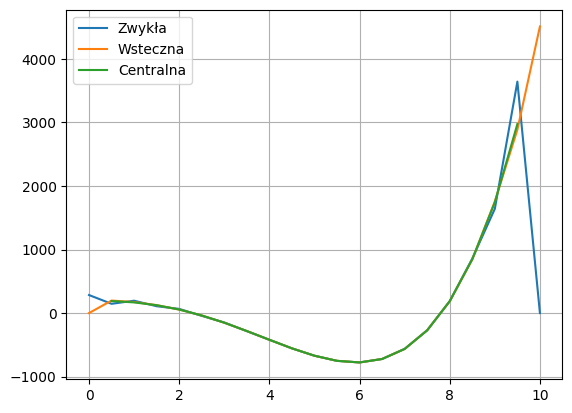

In [108]:
import matplotlib.pyplot as plt

plt.plot(pd_roznice_zwykle['x'], pd_roznice_zwykle['Pochodna'], label='Zwykła')
plt.plot(pd_roznice_wsteczne['x'], pd_roznice_wsteczne['Pochodna'], label='Wsteczna')
plt.plot(pd_roznice_centralne['x'], pd_roznice_centralne['Pochodna'], label='Centralna')

plt.legend()
plt.grid()
plt.show()
